In [2]:
#Import Library
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [3]:
#load dataset after preprocessing
dna = pd.read_csv('data_ap_n_a_n.csv')
dns = pd.read_csv('data_ap_n_s_n.csv')
dsa = pd.read_csv('data_ap_s_a_n.csv')
dss = pd.read_csv('data_ap_s_s_n.csv')

Epoch 1/100
7/7 [==============================] - 7s 241ms/step - loss: 0.6691 - accuracy: 0.6148 - val_loss: 0.6490 - val_accuracy: 0.6204
Epoch 2/100
7/7 [==============================] - 0s 38ms/step - loss: 0.6548 - accuracy: 0.6288 - val_loss: 0.6507 - val_accuracy: 0.6204
Epoch 3/100
7/7 [==============================] - 0s 37ms/step - loss: 0.6554 - accuracy: 0.6288 - val_loss: 0.6563 - val_accuracy: 0.6204
Epoch 4/100
7/7 [==============================] - 0s 37ms/step - loss: 0.6467 - accuracy: 0.6288 - val_loss: 0.6282 - val_accuracy: 0.6204
Epoch 5/100
7/7 [==============================] - 0s 39ms/step - loss: 0.6204 - accuracy: 0.6288 - val_loss: 0.5933 - val_accuracy: 0.6204
Epoch 6/100
7/7 [==============================] - 0s 39ms/step - loss: 0.5739 - accuracy: 0.6334 - val_loss: 0.5140 - val_accuracy: 0.7037
Epoch 7/100
7/7 [==============================] - 0s 36ms/step - loss: 0.4561 - accuracy: 0.7355 - val_loss: 0.4432 - val_accuracy: 0.8611
Epoch 8/100
7/7 [==

7/7 [==============================] - 0s 37ms/step - loss: 0.0571 - accuracy: 0.9884 - val_loss: 0.4461 - val_accuracy: 0.8889
Epoch 60/100
7/7 [==============================] - 0s 35ms/step - loss: 0.0274 - accuracy: 0.9884 - val_loss: 0.3777 - val_accuracy: 0.9074
Epoch 61/100
7/7 [==============================] - 0s 36ms/step - loss: 0.0245 - accuracy: 0.9907 - val_loss: 0.3755 - val_accuracy: 0.9074
Epoch 62/100
7/7 [==============================] - 0s 37ms/step - loss: 0.0207 - accuracy: 0.9930 - val_loss: 0.3643 - val_accuracy: 0.9167
Epoch 63/100
7/7 [==============================] - 0s 35ms/step - loss: 0.0230 - accuracy: 0.9907 - val_loss: 0.4093 - val_accuracy: 0.9074
Epoch 64/100
7/7 [==============================] - 0s 35ms/step - loss: 0.0182 - accuracy: 0.9930 - val_loss: 0.4217 - val_accuracy: 0.9074
Epoch 65/100
7/7 [==============================] - 0s 35ms/step - loss: 0.0237 - accuracy: 0.9930 - val_loss: 0.4069 - val_accuracy: 0.9167
Epoch 66/100
7/7 [========

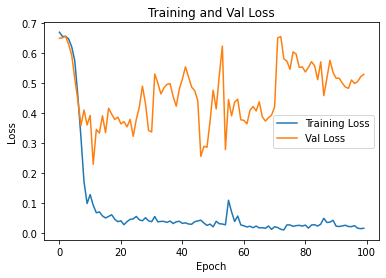

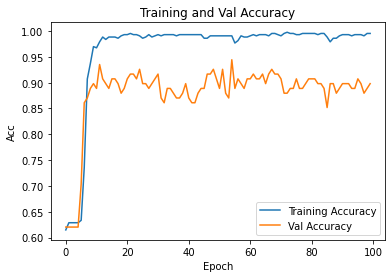

In [4]:
#Model Sentiment with NLTK stopword and Nazief Adriani Stemmer
texts = dna['Ulasan'].astype(str)
labels = dna['Label']

#Tokenizer and Pad Sequence
dna_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dna_token.fit_on_texts(texts)
X = dna_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model = Sequential()
model.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model.add(Bidirectional(LSTM(units = 128, dropout = 0.2, return_sequences = True)))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Bidirectional(LSTM(units = 64)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [5]:
model.save('n_a.h5')

Epoch 1/100
7/7 [==============================] - 7s 280ms/step - loss: 0.6688 - accuracy: 0.6265 - val_loss: 0.6544 - val_accuracy: 0.6204
Epoch 2/100
7/7 [==============================] - 0s 36ms/step - loss: 0.6486 - accuracy: 0.6288 - val_loss: 0.6483 - val_accuracy: 0.6204
Epoch 3/100
7/7 [==============================] - 0s 36ms/step - loss: 0.6466 - accuracy: 0.6288 - val_loss: 0.6281 - val_accuracy: 0.6204
Epoch 4/100
7/7 [==============================] - 0s 36ms/step - loss: 0.6259 - accuracy: 0.6288 - val_loss: 0.6012 - val_accuracy: 0.6204
Epoch 5/100
7/7 [==============================] - 0s 37ms/step - loss: 0.5800 - accuracy: 0.6288 - val_loss: 0.5292 - val_accuracy: 0.7130
Epoch 6/100
7/7 [==============================] - 0s 37ms/step - loss: 0.4650 - accuracy: 0.8028 - val_loss: 0.4091 - val_accuracy: 0.8611
Epoch 7/100
7/7 [==============================] - 0s 35ms/step - loss: 0.3269 - accuracy: 0.8840 - val_loss: 0.3953 - val_accuracy: 0.8519
Epoch 8/100
7/7 [==

7/7 [==============================] - 0s 52ms/step - loss: 0.0178 - accuracy: 0.9907 - val_loss: 0.4730 - val_accuracy: 0.9074
Epoch 60/100
7/7 [==============================] - 0s 54ms/step - loss: 0.0246 - accuracy: 0.9954 - val_loss: 0.4724 - val_accuracy: 0.9074
Epoch 61/100
7/7 [==============================] - 0s 37ms/step - loss: 0.0145 - accuracy: 0.9930 - val_loss: 0.4650 - val_accuracy: 0.9074
Epoch 62/100
7/7 [==============================] - 0s 38ms/step - loss: 0.0174 - accuracy: 0.9930 - val_loss: 0.4590 - val_accuracy: 0.9074
Epoch 63/100
7/7 [==============================] - 0s 38ms/step - loss: 0.0123 - accuracy: 0.9954 - val_loss: 0.4727 - val_accuracy: 0.9074
Epoch 64/100
7/7 [==============================] - 0s 40ms/step - loss: 0.0164 - accuracy: 0.9954 - val_loss: 0.4794 - val_accuracy: 0.9074
Epoch 65/100
7/7 [==============================] - 0s 37ms/step - loss: 0.1016 - accuracy: 0.9698 - val_loss: 0.7393 - val_accuracy: 0.8519
Epoch 66/100
7/7 [========

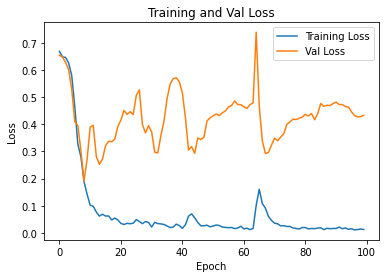

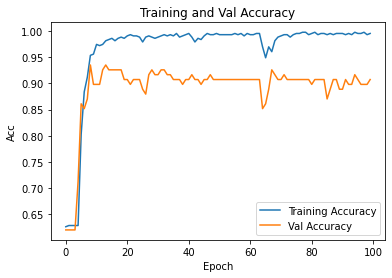

In [6]:
#Model Sentiment with NLTK stopword and Snowball Indonesia (Porter 2) Stemmer
texts = dns['Ulasan'].astype(str)
labels = dns['Label']

#Tokenizer and Pad Sequence
dns_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dns_token.fit_on_texts(texts)
X = dns_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model1 = Sequential()
model1.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model1.add(Bidirectional(LSTM(units = 128, dropout = 0.2, return_sequences = True)))
model1.add(Dropout(0.6))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Bidirectional(LSTM(units = 64)))
model1.add(Dropout(0.4))
model1.add(Dense(1, activation='sigmoid'))

# Compile model
model1.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model1.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model1.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [7]:
model1.save('n_s.h5')

Epoch 1/100
7/7 [==============================] - 6s 247ms/step - loss: 0.6771 - accuracy: 0.6148 - val_loss: 0.6539 - val_accuracy: 0.6204
Epoch 2/100
7/7 [==============================] - 0s 34ms/step - loss: 0.6594 - accuracy: 0.6288 - val_loss: 0.6430 - val_accuracy: 0.6204
Epoch 3/100
7/7 [==============================] - 0s 35ms/step - loss: 0.6484 - accuracy: 0.6288 - val_loss: 0.6428 - val_accuracy: 0.6204
Epoch 4/100
7/7 [==============================] - 0s 32ms/step - loss: 0.6402 - accuracy: 0.6288 - val_loss: 0.6287 - val_accuracy: 0.6204
Epoch 5/100
7/7 [==============================] - 0s 35ms/step - loss: 0.6378 - accuracy: 0.6288 - val_loss: 0.6076 - val_accuracy: 0.6204
Epoch 6/100
7/7 [==============================] - 0s 35ms/step - loss: 0.6032 - accuracy: 0.6288 - val_loss: 0.5823 - val_accuracy: 0.6204
Epoch 7/100
7/7 [==============================] - 0s 35ms/step - loss: 0.5630 - accuracy: 0.6334 - val_loss: 0.5187 - val_accuracy: 0.6574
Epoch 8/100
7/7 [==

7/7 [==============================] - 0s 35ms/step - loss: 0.0065 - accuracy: 0.9977 - val_loss: 0.1870 - val_accuracy: 0.9630
Epoch 60/100
7/7 [==============================] - 0s 35ms/step - loss: 0.0041 - accuracy: 0.9977 - val_loss: 0.2025 - val_accuracy: 0.9630
Epoch 61/100
7/7 [==============================] - 0s 36ms/step - loss: 0.0059 - accuracy: 0.9954 - val_loss: 0.2296 - val_accuracy: 0.9630
Epoch 62/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0034 - accuracy: 0.9977 - val_loss: 0.2460 - val_accuracy: 0.9630
Epoch 63/100
7/7 [==============================] - 0s 37ms/step - loss: 0.0060 - accuracy: 0.9954 - val_loss: 0.2582 - val_accuracy: 0.9630
Epoch 64/100
7/7 [==============================] - 0s 36ms/step - loss: 0.0054 - accuracy: 0.9977 - val_loss: 0.2585 - val_accuracy: 0.9630
Epoch 65/100
7/7 [==============================] - 0s 34ms/step - loss: 0.0114 - accuracy: 0.9930 - val_loss: 0.2610 - val_accuracy: 0.9537
Epoch 66/100
7/7 [========

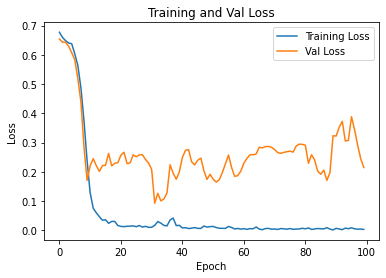

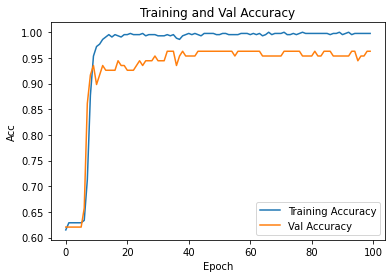

In [13]:
#Model Sentiment with Sastrawi stopword and Nazief Adriani Stemmer
texts = dsa['Ulasan']
labels = dsa['Label']

#Tokenizer and Pad Sequence
dsa_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dsa_token.fit_on_texts(texts)
X = dsa_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model2 = Sequential()
model2.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model2.add(Bidirectional(LSTM(units = 64, dropout = 0.2, return_sequences = True)))
model2.add(Dropout(0.6))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Bidirectional(LSTM(units = 32)))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation='sigmoid'))

# Compile model
model2.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model2.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [14]:
model2.save('s_a.h5')

Epoch 1/100
7/7 [==============================] - 7s 283ms/step - loss: 0.6803 - accuracy: 0.5986 - val_loss: 0.6468 - val_accuracy: 0.6204
Epoch 2/100
7/7 [==============================] - 0s 37ms/step - loss: 0.6505 - accuracy: 0.6288 - val_loss: 0.6400 - val_accuracy: 0.6204
Epoch 3/100
7/7 [==============================] - 0s 35ms/step - loss: 0.6404 - accuracy: 0.6288 - val_loss: 0.6243 - val_accuracy: 0.6204
Epoch 4/100
7/7 [==============================] - 0s 37ms/step - loss: 0.6230 - accuracy: 0.6288 - val_loss: 0.6164 - val_accuracy: 0.6204
Epoch 5/100
7/7 [==============================] - 0s 36ms/step - loss: 0.5940 - accuracy: 0.6288 - val_loss: 0.5420 - val_accuracy: 0.6389
Epoch 6/100
7/7 [==============================] - 0s 37ms/step - loss: 0.4936 - accuracy: 0.7332 - val_loss: 0.4667 - val_accuracy: 0.8796
Epoch 7/100
7/7 [==============================] - 0s 37ms/step - loss: 0.3526 - accuracy: 0.9002 - val_loss: 0.2583 - val_accuracy: 0.9074
Epoch 8/100
7/7 [==

7/7 [==============================] - 0s 36ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.1964 - val_accuracy: 0.9259
Epoch 60/100
7/7 [==============================] - 0s 36ms/step - loss: 0.0090 - accuracy: 0.9954 - val_loss: 0.2147 - val_accuracy: 0.9259
Epoch 61/100
7/7 [==============================] - 0s 37ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.2591 - val_accuracy: 0.9259
Epoch 62/100
7/7 [==============================] - 0s 35ms/step - loss: 0.0132 - accuracy: 0.9930 - val_loss: 0.2621 - val_accuracy: 0.9167
Epoch 63/100
7/7 [==============================] - 0s 38ms/step - loss: 0.0056 - accuracy: 0.9954 - val_loss: 0.2436 - val_accuracy: 0.9259
Epoch 64/100
7/7 [==============================] - 0s 35ms/step - loss: 0.0101 - accuracy: 0.9954 - val_loss: 0.2487 - val_accuracy: 0.9167
Epoch 65/100
7/7 [==============================] - 0s 35ms/step - loss: 0.0085 - accuracy: 0.9954 - val_loss: 0.2604 - val_accuracy: 0.9259
Epoch 66/100
7/7 [========

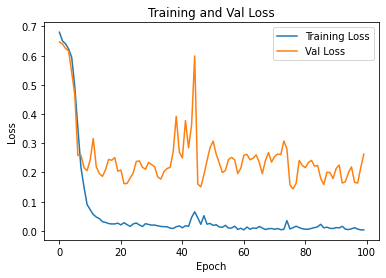

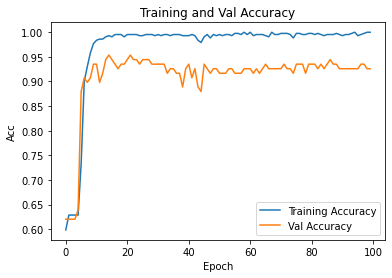

In [10]:
#Model Sentiment with Sastrawi stopword and Snowball Indonesia (Porter 2) Stemmer
texts = dss['Ulasan']
labels = dss['Label']

#Tokenizer and Pad Sequence
dna_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dna_token.fit_on_texts(texts)
X = dna_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model3 = Sequential()
model3.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model3.add(Bidirectional(LSTM(units = 128, dropout = 0.2, return_sequences = True)))
model3.add(Dropout(0.6))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(Bidirectional(LSTM(units = 64)))
model3.add(Dropout(0.4))
model3.add(Dense(1, activation='sigmoid'))

# Compile model
model3.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model3.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model3.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [11]:
model3.save('s_s.h5')